In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif

df = pd.read_csv("../data_sets/cardio_train.csv", sep=';')
df.head()




,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [4]:
df.shape

(70000, 13)

In [5]:
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

(70000, 13)
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null

#### a) Antal positiva/negativa för hjärt-kärlsjukdom

In [6]:
disceasestatus_count= df["cardio"].value_counts()
disceasestatus_count

cardio
0    35021
1    34979
Name: count, dtype: int64

#### b) Andelen personer med olika kolesterolnivåer

In [7]:
cholesterol_counts = df['cholesterol'].value_counts(normalize=True) * 100

cholesterol_counts

cholesterol
1    74.835714
2    13.641429
3    11.522857
Name: proportion, dtype: float64

#### c) Åldersfördelning

In [8]:
df["age"]

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64

#### Kovertera Ålder från Dagar till År

In [9]:
df['age_years'] = df['age']/365.25

print(df['age_years'].describe())

count    70000.000000
mean        53.302850
std          6.754967
min         29.563313
25%         48.361396
50%         53.943874
75%         58.390144
max         64.922656
Name: age_years, dtype: float64


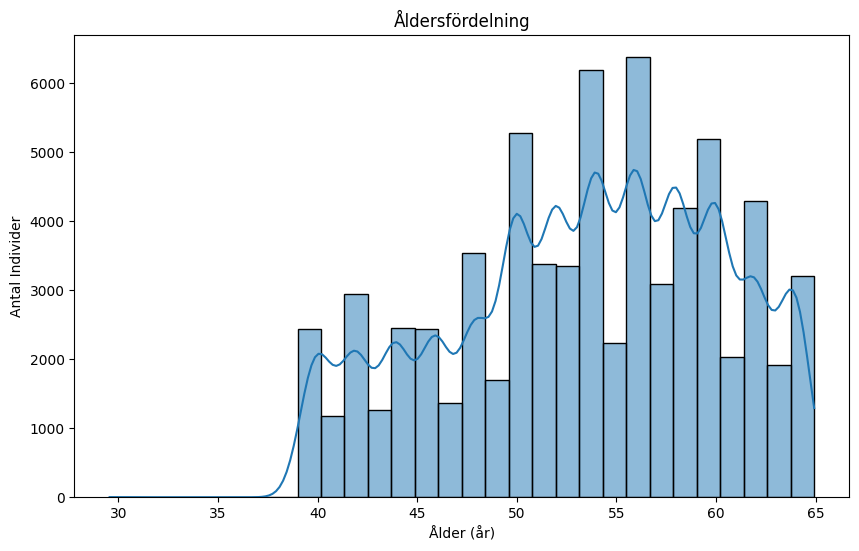

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age_years'], bins=30, kde=True)
plt.title('Åldersfördelning')
plt.xlabel('Ålder (år)')
plt.ylabel('Antal Individer')
plt.show()

#### d) Hur stor andel röker?

In [11]:
smokers_ratio= df['smoke'].value_counts(normalize=True) * 100

smokers_ratio

smoke
0    91.187143
1     8.812857
Name: proportion, dtype: float64

#### e) Hur ser viktfördelningen ut?

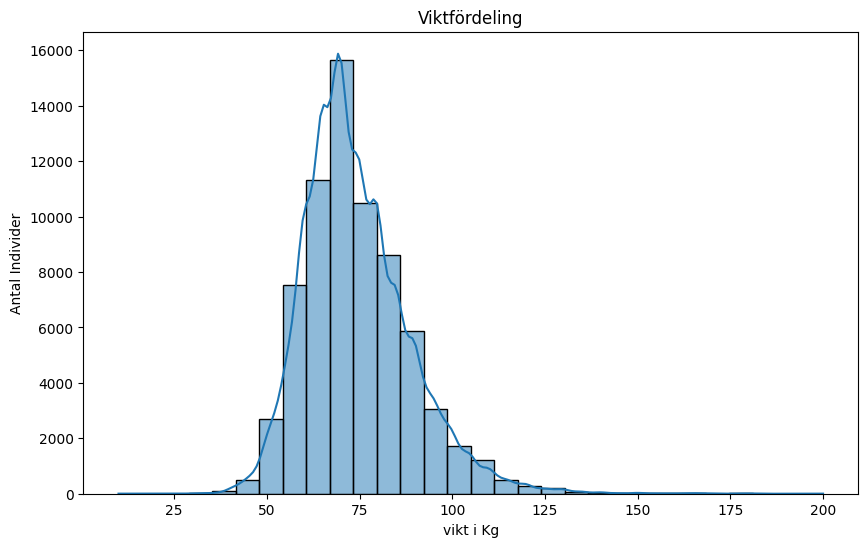

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], bins=30, kde=True)
plt.title('Viktfördeling')
plt.xlabel('vikt i Kg')
plt.ylabel('Antal Individer')
plt.show()

#### f) Hur ser längdfördelningen ut?

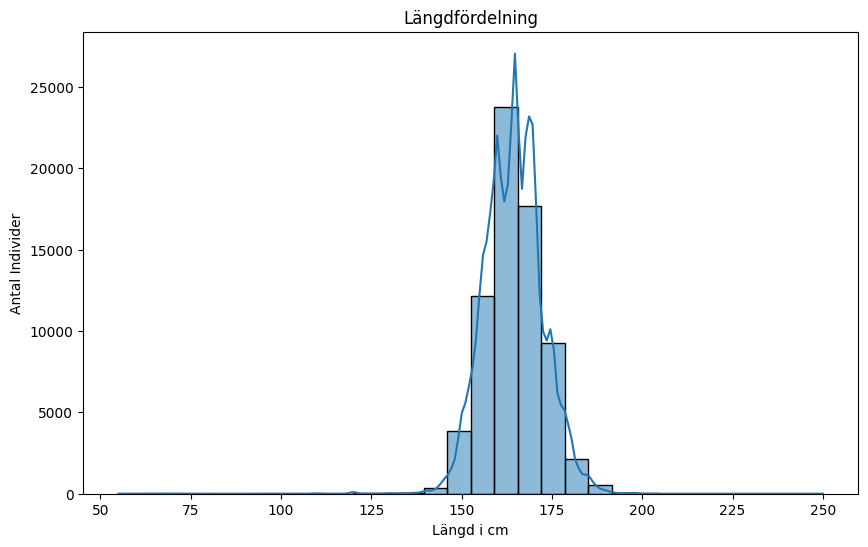

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['height'], bins=30, kde=True)
plt.title('Längdfördelning')
plt.xlabel('Längd i cm')
plt.ylabel('Antal Individer')
plt.show()

#### g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom?

In [14]:

gender_cardio_ratio= df.groupby('gender')['cardio'].value_counts(normalize=True)

gender_cardio_ratio

gender  cardio
1       0         0.503273
        1         0.496727
2       1         0.505231
        0         0.494769
Name: proportion, dtype: float64

#### 1.2.1 Feature Engineering 

##### a) skapa en feature för BMI (Body Mass Index)

In [15]:
# Innan vi räknar ut BMI, Konvertera höjd från cm till m.

df['height m'] = df['height'] / 100
df['BMI'] = df['weight']/ ((df['height']/100)**2)

print(df['BMI'])

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Name: BMI, Length: 70000, dtype: float64


In [16]:
# Rensa outliners och orimliga BMI-värden

df_filtered = df[(df['BMI'] > 10) & (df['BMI'] < 50)]

df_filtered

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height m,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.357290,1.68,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.381246,1.56,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.627652,1.65,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.249144,1.69,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.841205,1.56,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,57.697467,1.65,29.384757
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.676249,1.68,26.927438
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.199863,1.83,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.412731,1.63,27.099251


#### b) Skapa en kategorisk BMI-Feature

In [17]:
bins = [0, 10.5, 25, 30, np.inf]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
df_filtered['BMI_category'] = pd.cut(df_filtered['BMI'], bins=bins, labels=labels, right=False)



/var/folders/pj/ryhfwjn166511km50m9j9jpr0000gn/T/ipykernel_23061/499498965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['BMI_category'] = pd.cut(df_filtered['BMI'], bins=bins, labels=labels, right=False)


#### c) Undersök om kategorin är relevant(dess korrelationer)

In [18]:
# Konvertera kategorier tll numeriska värden för en enklare korrelationsberäkning
df_filtered['BMI_category_numeric'] = df_filtered['BMI_category'].cat.codes

numerical_df = df_filtered.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
print(correlation_matrix[['BMI_category_numeric']])

                      BMI_category_numeric
id                                0.001289
age                               0.101750
gender                           -0.084412
height                           -0.167339
weight                            0.762064
ap_hi                             0.025458
ap_lo                             0.036990
cholesterol                       0.166504
gluc                              0.109445
smoke                            -0.015967
alco                              0.025630
active                           -0.008943
cardio                            0.183351
age_years                         0.101750
height m                         -0.167339
BMI                               0.876044
BMI_category_numeric              1.000000


/var/folders/pj/ryhfwjn166511km50m9j9jpr0000gn/T/ipykernel_23061/4007569676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['BMI_category_numeric'] = df_filtered['BMI_category'].cat.codes


#### a) skapa en kategorisk Feature för Blodtryck

In [19]:
df_filtered = df[(df['ap_hi'] > 90) & 
                 (df['ap_hi']< 250) & 
                  (df['ap_lo'] > 60) & 
                  (df['ap_lo'] < 150)]


#### b) Skapa en kategorisk feature för Blodtryck

In [20]:
conditions = [
    (df_filtered['ap_hi'] < 120) & (df_filtered['ap_lo'] < 80),
    (df_filtered['ap_hi'] <=129) & (df_filtered['ap_lo'] < 80),
    (df_filtered['ap_hi'] >=130) & (df_filtered['ap_lo'] < 140),
    (df_filtered['ap_hi']>=140) | (df_filtered['ap_lo'] >= 90),
    (df_filtered['ap_hi'] > 180) | (df_filtered['ap_hi'] > 120)

]
choices = ['Normal', 'Elevated', 'High Blood Pressure Stage 1', 'High Blood Pressure Stage 2', 'Hypertensive Crisis']
df_filtered['BP_Category'] = np.select(conditions, choices, default='Unknown')

/var/folders/pj/ryhfwjn166511km50m9j9jpr0000gn/T/ipykernel_23061/1703424765.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['BP_Category'] = np.select(conditions, choices, default='Unknown')


#### c) Undersök Relevansen av den Kategorin

In [21]:
df_filtered['BP_Category_numeric'] = df_filtered['BP_Category'].astype('category').cat.codes
correlation_with_target = df_filtered[['BP_Category_numeric','cardio']].corr()


/var/folders/pj/ryhfwjn166511km50m9j9jpr0000gn/T/ipykernel_23061/3458222101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['BP_Category_numeric'] = df_filtered['BP_Category'].astype('category').cat.codes


#### 1.2.2 skapa två dataset

In [35]:
df_copy1 = df_filtered.copy()
df_copy2 = df_filtered.copy()

In [39]:
df_copy1.drop(['ap_hi', 'ap_lo', 'height', 'weight', 'BMI'], axis=1, inplace=True)

df_copy1

KeyError: "['ap_hi', 'ap_lo', 'height', 'weight', 'BMI'] not found in axis"

In [38]:
df_copy1 = pd.get_dummies(df_copy1, columns=['BMI', 'BP_Category_numeric', 'gender'])

KeyError: "['BMi'] not in index"

#### 1.2.3 Utförande
1. Välja lämpliga algoritmer
2. Dela Upp datan i tränings- och testset
3. Träna modeller
4. Utvärdera modellernas prestanda
5. Jämför resultaten mellan de två dataseten

#### Val av algoritmer
1. Logistisk regression
2. Random Forest
3. Gradient Boosting Machine(GBM): 

In [22]:
# Dela upp datan i tränings- och testset
X = pd.get_dummies(df_filtered.drop('cardio', axis=1))
y= df_filtered['cardio']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)
    

In [23]:
X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(
    df_with_dummies.drop('cardio', axis=1), 
    df_with_dummies['cardio'], 
    test_size=0.2, 
    random_state=42)

NameError: name 'df_with_dummies' is not defined

In [ ]:
lr_model_orig = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
lr_model_orig.fit(X_train_orig, y_train_orig)

/Users/rithwanali/.local/share/virtualenvs/dataprocessing_Rithwan_Mohamed_Ali-jdCu2s_4/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
non_numeric_columns = X_train_dummy.select_dtypes(include=['object']).columns
print(non_numeric_columns)

if len(non_numeric_columns) > 0:
    X_train_dummy = pd.get_dummies(X_train_dummy, columns=non_numeric_columns)
    X_test_dummy = pd.get_dummies(X_test_dummy, columns=non_numeric_columns)

Index([], dtype='object')


In [ ]:
lr_model_dummy = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

lr_model_dummy.fit(X_train_dummy, y_train_dummy)

/Users/rithwanali/.local/share/virtualenvs/dataprocessing_Rithwan_Mohamed_Ali-jdCu2s_4/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred_dummy = lr_model_dummy.predict(X_test_dummy)
y_pred_dummy

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
print(f"Accuracy: {accuracy_score(y_test_dummy, y_pred_dummy)}")
print(f"Precision: {precision_score(y_test_dummy, y_pred_dummy)}")
print(f"Recall: {recall_score(y_test_dummy, y_pred_dummy)}")
print(f"F1-Score: {f1_score(y_test_dummy, y_pred_dummy)}")
print(f"ROC AUC Score: {roc_auc_score(y_test_dummy, y_pred_dummy)}")

Accuracy: 0.7242481918538256
Precision: 0.7554320363820111
Recall: 0.6739293764087152
F1-Score: 0.7123570520965693
ROC AUC Score: 0.7249276511673205
